In [ ]:
#getting the dataset from kaggle
#import kaggle

In [ ]:
#!kaggle datasets list -s gene

In [ ]:
#!kaggle datasets download crawford/gene-expression -p C:/Users/Shru/Documents/drug_ind --unzip

In [1]:
#import the libraries needed for visualization
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Datasets'

In [2]:
path = 'C:\\Users\\Shru\\Documents\\Datasets'
os.chdir(path)

In [4]:
os.listdir('gene_expression')

['actual.csv',
 'data_set_ALL_AML_independent.csv',
 'data_set_ALL_AML_train.csv']

In [5]:
#Load the training data
df01_train_init = pd.read_csv('gene_expression/data_set_ALL_AML_train.csv')
# Transpose and reset index
df01_train = df01_train_init.T
df01_train.columns = df01_train.loc['Gene Accession Number']
df01_train = df01_train.drop(['Gene Description','Gene Accession Number'], axis=0)
df01_train.index.name = 'Patient_Num'

In [6]:
df01_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Patient_Num,,,,,,,,,,,,,,,,,,,,,
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
call.1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [7]:
#Load the test data
df01_test_init = pd.read_csv('gene_expression/data_set_ALL_AML_independent.csv')

df01_test = df01_test_init.T
df01_test.columns = df01_test.loc['Gene Accession Number']
df01_test = df01_test.drop(['Gene Description','Gene Accession Number'], axis=0)
df01_test.index.name = 'Patient_Num'

In [8]:
#print(df_train.info())
#print(df_train.head())
df01_test.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Patient_Num,,,,,,,,,,,,,,,,,,,,,
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
call.1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [9]:
print(df01_train.shape)
print(df01_test.shape)

(76, 7129)
(68, 7129)


In [10]:
index_list = list(df01_train.index.values)

for i in range(len(index_list)):
    if 'call' not in index_list[i]:
        num = int(''.join(filter(str.isdigit, index_list[i])) or 0)
        index_list[i] = str(num)
    else:
        #num2 = int(''.join(filter(str.isdigit, index_list[i])) or 0)
        index_list[i] = str(num) + '_call'

print(index_list)

['1', '1_call', '2', '2_call', '3', '3_call', '4', '4_call', '5', '5_call', '6', '6_call', '7', '7_call', '8', '8_call', '9', '9_call', '10', '10_call', '11', '11_call', '12', '12_call', '13', '13_call', '14', '14_call', '15', '15_call', '16', '16_call', '17', '17_call', '18', '18_call', '19', '19_call', '20', '20_call', '21', '21_call', '22', '22_call', '23', '23_call', '24', '24_call', '25', '25_call', '26', '26_call', '27', '27_call', '34', '34_call', '35', '35_call', '36', '36_call', '37', '37_call', '38', '38_call', '28', '28_call', '29', '29_call', '30', '30_call', '31', '31_call', '32', '32_call', '33', '33_call']


In [11]:
index_list2 = list(df01_test.index.values)
#num_list = [int(sub) for sub in index_list2 if sub.isnumeric()]
#num_list.sort()
#print(num_list)
for i in range(len(index_list2)):
    if 'call' not in index_list2[i]:
        num2 = int(''.join(filter(str.isdigit, index_list2[i])) or 0)
        index_list2[i] = str(num2)
    else:
        #num2 = int(''.join(filter(str.isdigit, index_list2[i])) or 0)
        index_list2[i] = str(num2) + '_call'

print(index_list2)

['39', '39_call', '40', '40_call', '42', '42_call', '47', '47_call', '48', '48_call', '49', '49_call', '41', '41_call', '43', '43_call', '44', '44_call', '45', '45_call', '46', '46_call', '70', '70_call', '71', '71_call', '72', '72_call', '68', '68_call', '69', '69_call', '67', '67_call', '55', '55_call', '56', '56_call', '59', '59_call', '52', '52_call', '53', '53_call', '51', '51_call', '50', '50_call', '54', '54_call', '57', '57_call', '58', '58_call', '60', '60_call', '61', '61_call', '65', '65_call', '66', '66_call', '63', '63_call', '64', '64_call', '62', '62_call']


In [12]:
df02_train = df01_train.reset_index()
df02_train.index.name = 'index'
df02_train['Patient_Num'] = df02_train.Patient_Num.map(dict(zip(df01_train.index.values, index_list)))
#df01_train.head(10)
df03_train = df02_train.set_index('Patient_Num')
df03_train.index

Index(['1', '1_call', '2', '2_call', '3', '3_call', '4', '4_call', '5',
       '5_call', '6', '6_call', '7', '7_call', '8', '8_call', '9', '9_call',
       '10', '10_call', '11', '11_call', '12', '12_call', '13', '13_call',
       '14', '14_call', '15', '15_call', '16', '16_call', '17', '17_call',
       '18', '18_call', '19', '19_call', '20', '20_call', '21', '21_call',
       '22', '22_call', '23', '23_call', '24', '24_call', '25', '25_call',
       '26', '26_call', '27', '27_call', '34', '34_call', '35', '35_call',
       '36', '36_call', '37', '37_call', '38', '38_call', '28', '28_call',
       '29', '29_call', '30', '30_call', '31', '31_call', '32', '32_call',
       '33', '33_call'],
      dtype='object', name='Patient_Num')

In [13]:
df02_test = df01_test.reset_index()
df02_test.index.name = 'index'
df02_test['Patient_Num'] = df02_test.Patient_Num.map(dict(zip(df01_test.index.values, index_list2)))
#df01_train.head(10)
df03_test = df02_test.set_index('Patient_Num')
df03_test.index

Index(['39', '39_call', '40', '40_call', '42', '42_call', '47', '47_call',
       '48', '48_call', '49', '49_call', '41', '41_call', '43', '43_call',
       '44', '44_call', '45', '45_call', '46', '46_call', '70', '70_call',
       '71', '71_call', '72', '72_call', '68', '68_call', '69', '69_call',
       '67', '67_call', '55', '55_call', '56', '56_call', '59', '59_call',
       '52', '52_call', '53', '53_call', '51', '51_call', '50', '50_call',
       '54', '54_call', '57', '57_call', '58', '58_call', '60', '60_call',
       '61', '61_call', '65', '65_call', '66', '66_call', '63', '63_call',
       '64', '64_call', '62', '62_call'],
      dtype='object', name='Patient_Num')

In [18]:
## We need to filter out the calls since we don't really have an explanation for what it is
## and a list comprehension will not work by itself since we need to filter rows

#df02 = df01[df01[['Patient_Num']].apply(lambda x: x[0].isdigit(), axis=1)]
#df02.head(10)
df_tr_filter = df03_train.loc[[x for x in index_list if x.isnumeric()]]
df_te_filter = df03_test.loc[[x for x in index_list2 if x.isnumeric()]]
df_tr_filter.head(14)

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Patient_Num,,,,,,,,,,,,,,,,,,,,,
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39


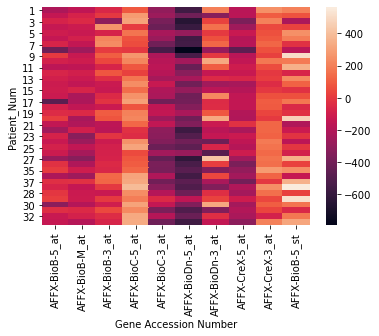

In [17]:
##Visualization test
# Need to convert objects to numeric before using/saving
df_small = df_tr_filter.iloc[:,0:10]
df_small = df_small.apply(pd.to_numeric)
sns.heatmap(df_small)

In [19]:
## Convert intensity values to numerical values
df_train = df_tr_filter.apply(pd.to_numeric)
df_test = df_te_filter.apply(pd.to_numeric)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 33
Columns: 7129 entries, AFFX-BioB-5_at to Z78285_f_at
dtypes: int64(7129)
memory usage: 2.1+ MB


In [27]:
## Load in actual patient cancer type and concat to training set
df_cancer_init = pd.read_csv('gene_expression/actual.csv')
df_cancer_init.head(10)

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


In [63]:
## Cleaning data
# Our df_train and df_test are not in order
# Sort
a = df_train.index.to_series().astype(int).sort_values()
df_train_sort = df_train.reindex(index=a.index)
#df_train_sort.index
b = df_test.index.to_series().astype(int).sort_values()
df_test_sort = df_test.reindex(index=b.index)

# Get cancer classifications in a df to combine to training set
df01_cancer = df_cancer_init[df_cancer_init.patient <= 38]
df01_cancer = df01_cancer.rename(columns={'patient':'Patient_Num'})
df02_cancer = df01_cancer.set_index('Patient_Num')
df03_cancer = df02_cancer
df03_cancer.index = df03_cancer.index.map(str)
df03_cancer.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38'],
      dtype='object', name='Patient_Num')

In [70]:
## Cleaning data
# Combine data with class labels
train = pd.merge(df03_cancer,df_train_sort,left_index=True,right_index=True)
train['cancer'] = train.cancer.astype('category')
# cancer type is an object we can transform it into a categorical data

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 38
Columns: 7130 entries, cancer to Z78285_f_at
dtypes: category(1), int64(7129)
memory usage: 2.1+ MB


In [77]:
df_cancer = df_cancer_init.rename(columns={'patient':'Patient_Num'})
df_cancer = df_cancer.set_index('Patient_Num')
df_cancer.index = df_cancer.index.map(str)
df_cancer.cancer = df_cancer.cancer.astype('category')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 72
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   cancer  72 non-null     category
dtypes: category(1)
memory usage: 744.0+ bytes


In [ ]:
# Save our cleaned up dataframes for further analysis

In [79]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Datasets\\gene_expression\\data'

In [73]:
new_folder = 'C:/Users/Shru/Documents/Datasets/gene_expression/data'
try:
    os.mkdir(new_folder)
except:
    print('Creation of the directory %s failed' %new_folder)
else:
    print('Successfully created the directory %s' %new_folder)

Successfully created the directory C:/Users/Shru/Documents/Datasets/gene_expression/data


In [78]:
path = 'C:\\Users\\Shru\\Documents\\Datasets\\gene_expression\\data'
os.chdir(path)

In [80]:
# train
# df_test_sort
# df_cancer
try:
    train.to_csv('training_set.csv')
    df_test_sort.to_csv('testing_set.csv')
    df_cancer.to_csv('cancer_type_set.csv')
except:
    print('fail')
else:
    print('success')

success
